In [2]:
# Cleaned up code for parsing by vessel type logicals 9-17-24
#  comment out section for 'metric1' and 'metric2' to handle 2 vars at a time
# Then plotting boxplots for each type for 2 groups

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Optional for statistics
from scipy import stats

# Load the CSV file
#pathname = '/Users/jcoleman/Documents/--LARGE DATA--/#Pizzi/TBI-sham leak analysis/scripts/matlab-copy/August 2024/'
pathname = '/Users/jcoleman/Documents/GitHub/NMCoop_Shared/#Pizzi/' #Data1_output1b_transii.csv
pathname = '/Users/jcoleman/Documents/GitHub/NMCoop_Shared/#Pizzi/results/data3/'
filename = 'Data1_output1b_transii.csv' #tidy format CSV
df = pd.read_csv(pathname+filename)

df['group'] = df['group'].map({'A': 'rmTBI', 'B': 'Sham'})

# print(df['filename'])
print(df['rowID'])
print(df['group'])
# Basic analysis: means, std, etc.
#group_means = df.groupby('group')['meanFWHM'].mean()

0       ZT10_16X6x_gg_800nm_m5_roi2_00003_ROIs_classA_01
1       ZT10_16X6x_gg_800nm_m5_roi2_00003_ROIs_classA_02
2       ZT10_16X6x_gg_800nm_m5_roi2_00003_ROIs_classA_03
3       ZT10_16X6x_gg_800nm_m5_roi2_00003_ROIs_classA_04
4       ZT10_16X6x_gg_800nm_m5_roi2_00003_ROIs_classA_05
                             ...                        
207    ZT10_16X6x_gg_800nm_m16_roi1_00001_ROIs_classA_14
208    ZT10_16X6x_gg_800nm_m16_roi1_00001_ROIs_classA_15
209    ZT10_16X6x_gg_800nm_m16_roi1_00001_ROIs_classA_16
210    ZT10_16X6x_gg_800nm_m16_roi1_00001_ROIs_classA_17
211    ZT10_16X6x_gg_800nm_m16_roi1_00001_ROIs_classA_18
Name: rowID, Length: 212, dtype: object
0      rmTBI
1      rmTBI
2      rmTBI
3      rmTBI
4      rmTBI
       ...  
207     Sham
208     Sham
209     Sham
210     Sham
211     Sham
Name: group, Length: 212, dtype: object


In [3]:
# function new - new df for box plots etc

# 9-19-24 note - THIS COULD BE TIDY IMPORT
import pandas as pd
import numpy as np

# Pick some columns/values to plot
metric1='meanFWHM'
metric2='meanFeFv'
metric3='stdevFWHM'
metric4='stdevFeFv'

# make a new dataframe for x='group', y=metric1, hue='vessel_type', data=final_df,
new_df = df.copy([[metric1, metric2, metric3, metric4, 'group']])

# Assuming 'df' and 'new_df' already exist
# Create the new 'vessel_type' column
new_df['vessel_type'] = np.select(
    [
        df['capLogical'] == True,
        df['venLogical'] == True,
        df['artLogical'] == True
    ],
    [
        'capillary',
        'venule',
        'arteriole'
    ],
    default='unknown'
)

# print(new_df.head())
# print(new_df['vessel_type'])

# Remove rows with NaN values
df_clean = new_df.dropna()
print(f"\nRemoved {len(df) - len(df_clean)} rows with NaN values")

print(df_clean.head())
print(df_clean['vessel_type'])

# # print(new_df['meanFWHM'])
# print(new_df['group'])


# create new column in 'new_df' for 'vessel_type' with string category 'capillary', 'venule', or 'arteriole' based on
#   corresponding logicals from 'capLogical', 'venLogical, 'artLogical' columns in 'df'



# print(new_df['vessel_type'])





Removed 22 rows with NaN values
                                              rowID  meanFWHM  stdevFWHM  \
0  ZT10_16X6x_gg_800nm_m5_roi2_00003_ROIs_classA_01  3.740378   0.120027   
1  ZT10_16X6x_gg_800nm_m5_roi2_00003_ROIs_classA_02  4.100067   0.120158   
2  ZT10_16X6x_gg_800nm_m5_roi2_00003_ROIs_classA_03  6.326261   0.091814   
3  ZT10_16X6x_gg_800nm_m5_roi2_00003_ROIs_classA_04  6.066305   0.070735   
5  ZT10_16X6x_gg_800nm_m6_roi1_00001_ROIs_classA_01  5.886713   0.134211   

    minFWHM   maxFWHM  meanFeFv  stdevFeFv   minFeFv   maxFeFv      X  ...  \
0  3.542297  3.907355  0.301351   0.088444  0.164055  0.406216   30.0  ...   
1  3.922870  4.245508  0.718676   0.103000  0.559359  0.933077  213.0  ...   
2  6.202881  6.441604  0.083048   0.026864  0.049834  0.148631  436.0  ...   
3  5.974274  6.145408  0.849531   0.084406  0.713789  0.964376  278.0  ...   
5  5.693535  6.101866  0.222588   0.057162  0.110756  0.307333  404.0  ...   

   preCapLogical  pstCapLogical  midVenLo

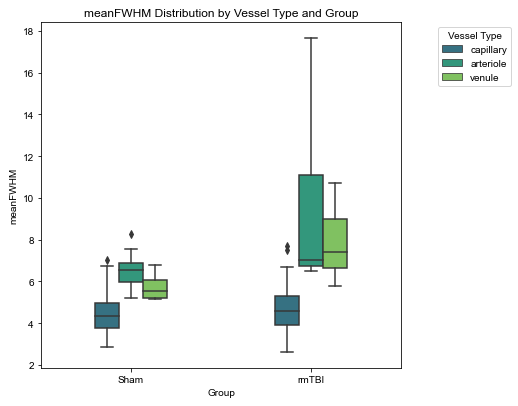

In [4]:
# Boxplot - 'metric1'

# Set figure size
plt.figure(figsize=(10, 6))

# Set color options
viridis_palette = sns.color_palette('viridis', 4)[1:4]  # Select 3 contrasting colors

# Adjust boxplot width and add gaps
sns.boxplot(x='group', y=metric1, hue='vessel_type', data=df_clean, 
            width=0.4,  # Adjust boxplot width (~50-70% of original)
            dodge=True,  # Add gap between vessel types
            palette=viridis_palette,
            order=['Sham', 'rmTBI'])  # Apply Viridis colormap  = 'viridis'

# Increase gap between groups
plt.xticks(rotation=0)  # Remove xtick rotation
plt.tight_layout()  # Keep figure tight to bars

# Add title and labels
plt.title(metric1 + ' Distribution by Vessel Type and Group')
plt.xlabel('Group')
plt.ylabel(metric1)

# Adjust legend
# plt.legend(title='Vessel Type', loc='upper right', bbox_to_anchor=(1.05, 1))
# Place legend outside upper right
plt.legend(title='Vessel Type', loc='upper right', bbox_to_anchor=(1.32, 1))
# plt.legend(title='Filename', bbox_to_anchor=(1.05, 1), loc='upper left')


# Increase gap between groups
# plt.subplots_adjust(left=0.12, right=0.8, top=0.9, bottom=0.1)
plt.subplots_adjust(left=0.4, right=.9, top=0.9, bottom=0.1)
# Adjust the spacing between groups
# plt.subplots_adjust(wspace=.1) 

# val = 2
# plt.xlim(-val, 1 + val)
# plt.xlim(1-val, 2+val)


# Save plot as PDF
figure_filename = metric1 + ' Distribution by Vessel Type and Group_092124'
plt.savefig(figure_filename + '.pdf', format='pdf', dpi=300, bbox_inches='tight')

plt.style.use("seaborn-white")
# print(plt.style.available)
plt.show()

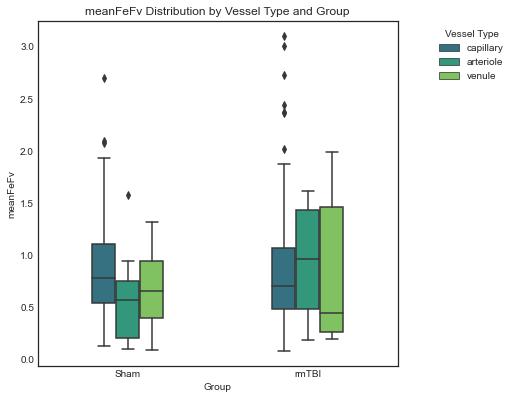

In [5]:
# Boxplot - 'metric2'

# Set figure size
plt.figure(figsize=(10, 6))

# Set color options
viridis_palette = sns.color_palette('viridis', 4)[1:4]  # Select 3 contrasting colors

# Adjust boxplot width and add gaps
sns.boxplot(x='group', y=metric2, hue='vessel_type', data=df_clean, 
            width=0.4,  # Adjust boxplot width (~50-70% of original)
            dodge=True,  # Add gap between vessel types
            palette=viridis_palette,
            order=['Sham', 'rmTBI'])  # Apply Viridis colormap  = 'viridis'

# Increase gap between groups
plt.xticks(rotation=0)  # Remove xtick rotation
plt.tight_layout()  # Keep figure tight to bars

# Add title and labels
plt.title(metric2 + ' Distribution by Vessel Type and Group')
plt.xlabel('Group')
plt.ylabel(metric2)

# Adjust legend
# plt.legend(title='Vessel Type', loc='upper right', bbox_to_anchor=(1.05, 1))
# Place legend outside upper right
plt.legend(title='Vessel Type', loc='upper right', bbox_to_anchor=(1.32, 1))
# plt.legend(title='Filename', bbox_to_anchor=(1.05, 1), loc='upper left')


# Increase gap between groups
# plt.subplots_adjust(left=0.12, right=0.8, top=0.9, bottom=0.1)
plt.subplots_adjust(left=0.4, right=.9, top=0.9, bottom=0.1)
# Adjust the spacing between groups
# plt.subplots_adjust(wspace=.1) 

# val = 2
# plt.xlim(-val, 1 + val)
# plt.xlim(1-val, 2+val)


# Save plot as PDF
figure_filename = metric2 + ' Distribution by Vessel Type and Group_092124'
plt.savefig(figure_filename + '.pdf', format='pdf', dpi=300, bbox_inches='tight')

plt.style.use("seaborn-white")
plt.show()

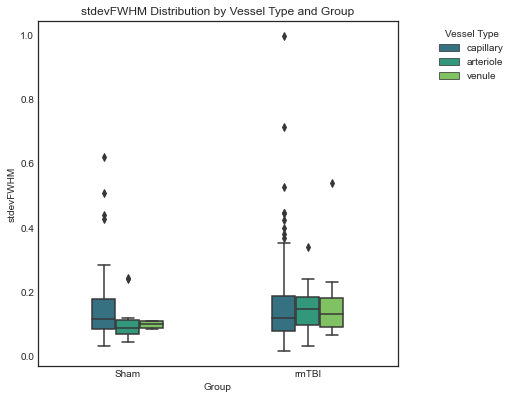

In [6]:
# Boxplot - 'metric3'

# Set figure size
plt.figure(figsize=(10, 6))

# Set color options
viridis_palette = sns.color_palette('viridis', 4)[1:4]  # Select 3 contrasting colors

# Adjust boxplot width and add gaps
sns.boxplot(x='group', y=metric3, hue='vessel_type', data=df_clean, 
            width=0.4,  # Adjust boxplot width (~50-70% of original)
            dodge=True,  # Add gap between vessel types
            palette=viridis_palette,
            order=['Sham', 'rmTBI']) 

# Increase gap between groups
plt.xticks(rotation=0)  # Remove xtick rotation
plt.tight_layout()  # Keep figure tight to bars

# Add title and labels
plt.title(metric3 + ' Distribution by Vessel Type and Group')
plt.xlabel('Group')
plt.ylabel(metric3)

# Adjust legend
# plt.legend(title='Vessel Type', loc='upper right', bbox_to_anchor=(1.05, 1))
# Place legend outside upper right
plt.legend(title='Vessel Type', loc='upper right', bbox_to_anchor=(1.32, 1))
# plt.legend(title='Filename', bbox_to_anchor=(1.05, 1), loc='upper left')


# Increase gap between groups
# plt.subplots_adjust(left=0.12, right=0.8, top=0.9, bottom=0.1)
plt.subplots_adjust(left=0.4, right=.9, top=0.9, bottom=0.1)
# Adjust the spacing between groups
# plt.subplots_adjust(wspace=.1) 

# val = 2
# plt.xlim(-val, 1 + val)
# plt.xlim(1-val, 2+val)


# Save plot as PDF
figure_filename = metric3 + ' Distribution by Vessel Type and Group_092124'
plt.savefig(figure_filename + '.pdf', format='pdf', dpi=300, bbox_inches='tight')

plt.style.use("seaborn-white")
plt.show()

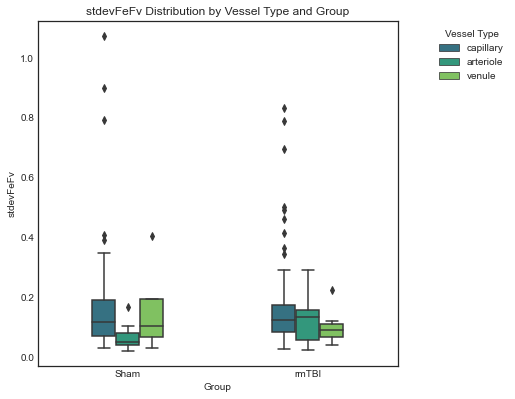

In [7]:
# Boxplot - 'metric4'

# Set figure size
plt.figure(figsize=(10, 6))

# Set color options
viridis_palette = sns.color_palette('viridis', 4)[1:4]  # Select 3 contrasting colors

# Adjust boxplot width and add gaps
sns.boxplot(x='group', y=metric4, hue='vessel_type', data=df_clean, 
            width=0.4,  # Adjust boxplot width (~50-70% of original)
            dodge=True,  # Add gap between vessel types
            palette=viridis_palette,
            order=['Sham', 'rmTBI']) 

# Increase gap between groups
plt.xticks(rotation=0)  # Remove xtick rotation
plt.tight_layout()  # Keep figure tight to bars

# Add title and labels
plt.title(metric4 + ' Distribution by Vessel Type and Group')
plt.xlabel('Group')
plt.ylabel(metric4)

# Adjust legend
# plt.legend(title='Vessel Type', loc='upper right', bbox_to_anchor=(1.05, 1))
# Place legend outside upper right
plt.legend(title='Vessel Type', loc='upper right', bbox_to_anchor=(1.32, 1))
# plt.legend(title='Filename', bbox_to_anchor=(1.05, 1), loc='upper left')


# Increase gap between groups
# plt.subplots_adjust(left=0.12, right=0.8, top=0.9, bottom=0.1)
plt.subplots_adjust(left=0.4, right=.9, top=0.9, bottom=0.1)
# Adjust the spacing between groups
# plt.subplots_adjust(wspace=.1) 

# val = 2
# plt.xlim(-val, 1 + val)
# plt.xlim(1-val, 2+val)


# Save plot as PDF
figure_filename = metric4 + ' Distribution by Vessel Type and Group_092124'
plt.savefig(figure_filename + '.pdf', format='pdf', dpi=300, bbox_inches='tight')

plt.style.use("seaborn-white")
plt.show()

In [13]:
# NEW _ KEEP

import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your data is in a DataFrame called 'df'
# with columns 'group', 'vessel_type', and 'meanFWHM'
# metric2
metric_choice = metric2
print(f"Data source: ")
print(f"{metric_choice}")

# Remove rows with NaN values
df_clean = new_df.dropna()
print(f"\nRemoved {len(df) - len(df_clean)} rows with NaN values")

# 1. Descriptive Statistics
print(df_clean.groupby(['group', 'vessel_type'])[metric_choice].describe())

# 2. Normality Test (Shapiro-Wilk test)
for group in df_clean['group'].unique():
    for vessel in df_clean['vessel_type'].unique():
        data = df_clean[(df_clean['group'] == group) & (df_clean['vessel_type'] == vessel)][metric_choice]
        stat, p = stats.shapiro(data)
        print(f'Shapiro-Wilk test for {group}, {vessel}: statistic={stat:.4f}, p-value={p:.4f}')

# 3. Two-way ANOVA (using scipy)
groups = df_clean['group'].unique()
vessel_types = df_clean['vessel_type'].unique()

f_val, p_val = stats.f_oneway(*[df_clean[df_clean['group'] == group][metric_choice] for group in groups])
print("\nOne-way ANOVA for groups:")
print(f"F-value: {f_val:.4f}, p-value: {p_val:.4f}")

f_val, p_val = stats.f_oneway(*[df_clean[df_clean['vessel_type'] == vt][metric_choice] for vt in vessel_types])
print("\nOne-way ANOVA for vessel types:")
print(f"F-value: {f_val:.4f}, p-value: {p_val:.4f}")

# 4. Non-parametric alternative: Kruskal-Wallis H-test
kruskal_group = stats.kruskal(*[group[metric_choice].values for name, group in df_clean.groupby('group')])
kruskal_vessel = stats.kruskal(*[group[metric_choice].values for name, group in df_clean.groupby('vessel_type')])

print("\nKruskal-Wallis H-test results:")
print(f"Group effect: statistic={kruskal_group.statistic:.4f}, p-value={kruskal_group.pvalue:.4f}")
print(f"Vessel type effect: statistic={kruskal_vessel.statistic:.4f}, p-value={kruskal_vessel.pvalue:.4f}")

# 5. Post-hoc test: Dunn's test (as an alternative to Tukey's HSD)
from scipy.stats import rankdata
from statsmodels.stats.multicomp import pairwise_tukeyhsd

def dunn_test(data, groups):
    ranks = rankdata(data)
    k = len(np.unique(groups))
    n = len(data)
    
    # Calculate rank sums for each group
    rank_sums = [np.sum(ranks[groups == g]) for g in np.unique(groups)]
    
    # Calculate test statistic
    H = (12 / (n * (n + 1))) * np.sum([(r ** 2) / ng for r, ng in zip(rank_sums, [np.sum(groups == g) for g in np.unique(groups)])])
    H = H - 3 * (n + 1)
    
    df = k - 1
    p_value = 1 - stats.chi2.cdf(H, df)
    
    return H, p_value

print("\nDunn's test results:")
H, p = dunn_test(df_clean[metric_choice], df_clean['group'] + df_clean['vessel_type'])
print(f"H-statistic: {H:.4f}, p-value: {p:.4f}")

# Save stats to TXT file
stats2txt_filename = metric_choice + ' 1way_anovas by Group-VesselType_092124.txt'
with open(stats2txt_filename, 'w') as f:
    f.write("Data source:\n")
    f.write(f"{metric_choice}\n")
    f.write("Removed rows with NaN values:\n")
    f.write(f"{len(df) - len(df_clean)}\n\n")

    f.write("Descriptive Statistics:\n")
    f.write(df_clean.groupby(['group', 'vessel_type'])[metric_choice].describe().to_string() + "\n\n")

    f.write("Normality Test (Shapiro-Wilk test):\n")
    for group in df_clean['group'].unique():
        for vessel in df_clean['vessel_type'].unique():
            data = df_clean[(df_clean['group'] == group) & (df_clean['vessel_type'] == vessel)][metric_choice]
            stat, p = stats.shapiro(data)
            f.write(f'Shapiro-Wilk test for {group}, {vessel}: statistic={stat:.4f}, p-value={p:.4f}\n')

    f.write("\nOne-way ANOVA for groups:\n")
    f.write(f"F-value: {f_val:.4f}, p-value: {p_val:.4f}\n\n")

    f.write("One-way ANOVA for vessel types:\n")
    f.write(f"F-value: {f_val:.4f}, p-value: {p_val:.4f}\n\n")

    f.write("Kruskal-Wallis H-test results:\n")
    f.write(f"Group effect: statistic={kruskal_group.statistic:.4f}, p-value={kruskal_group.pvalue:.4f}\n")
    f.write(f"Vessel type effect: statistic={kruskal_vessel.statistic:.4f}, p-value={kruskal_vessel.pvalue:.4f}\n\n")

    f.write("Dunn's test results:\n")
    f.write(f"H-statistic: {H:.4f}, p-value: {p:.4f}\n")


Data source: 
meanFeFv

Removed 22 rows with NaN values
                   count      mean       std       min       25%       50%  \
group vessel_type                                                            
Sham  arteriole     10.0  0.581221  0.458789  0.097021  0.199142  0.569848   
      capillary     56.0  0.892639  0.537139  0.123071  0.535532  0.777305   
      venule         4.0  0.678833  0.519847  0.090134  0.390841  0.652843   
rmTBI arteriole     10.0  0.927118  0.538110  0.187184  0.485670  0.964978   
      capillary    102.0  0.870954  0.617031  0.083048  0.477840  0.702858   
      venule         8.0  0.828302  0.737460  0.190631  0.262748  0.445441   

                        75%       max  
group vessel_type                      
Sham  arteriole    0.748708  1.578884  
      capillary    1.103386  2.694953  
      venule       0.940835  1.319513  
rmTBI arteriole    1.427665  1.608951  
      capillary    1.065166  3.095309  
      venule       1.461780  1.985035  

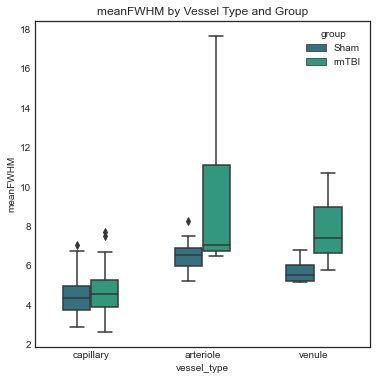

In [22]:
# 6. Visualization

metric_choice = metric1

plt.figure(figsize=(6, 6))
sns.boxplot(x='vessel_type', y=metric_choice, hue='group', data=df_clean,
              width=0.5, dodge=True, palette=viridis_palette, hue_order=['Sham', 'rmTBI'])
# sns.boxplot(x='group', y=metric_choice, hue='vessel_type', data=new_df, 
#             width=0.4,  # Adjust boxplot width (~50-70% of original)
#             dodge=True,  # Add gap between vessel types
#             palette=viridis_palette,
#             order=['Sham', 'rmTBI']) 
plt.title(metric_choice + ' by Vessel Type and Group')

# Save plot as PDF
figure_filename = metric_choice + ' Distribution by Group-VesselType_092124'
plt.savefig(figure_filename + '.pdf', format='pdf', dpi=300, bbox_inches='tight')

plt.style.use("seaborn-white")
plt.show()

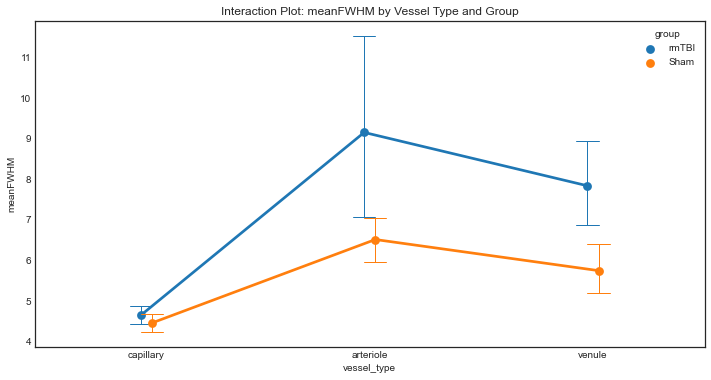

In [23]:
# 7. Interaction plot - adapt for above code
""""
sns.pointplot() creates a point plot, displaying:

Means: Average values for each group.
Error bars: Confidence intervals (CIs) for the means.

Parameters:
x='vessel_type': X-axis represents vessel types.
y=metric_choice: Y-axis represents the chosen metric.
hue='group': Color hue represents groups (rmTBI and Sham).
data=df_clean: Data source is the cleaned DataFrame.
dodge=True: Groups are displayed side-by-side (dodged).
ci=68: Error bars represent 68% confidence intervals.

Interpretation:
Points represent group means.
Error bars indicate variability and uncertainty.
Overlapping error bars suggest no significant difference.

Customization:
Change ci value for different confidence levels (e.g., ci=95).
Use capsize to adjust error bar cap size.
Add scale to adjust point size.
"""
# metric_choice = metric2
plt.figure(figsize=(12, 6))
sns.pointplot(x='vessel_type', y=metric_choice, hue='group', data=df_clean, dodge=True,
              ci=95, errwidth=1, capsize=0.1)
# sns.pointplot(x='vessel_type', y=metric_choice, hue='group', data=df_clean, dodge=True,
#               ci=None, errwidth=1, capsize=0.2)
plt.title('Interaction Plot: ' + metric_choice + ' by Vessel Type and Group')
plt.show()

In [9]:
import numpy as np
import scipy

print(f"NumPy version: {np.__version__}")
print(f"SciPy version: {scipy.__version__}")

# Add this after the data validation section
print("\nNumber of values in each category:")
value_counts = new_df.groupby(['group', 'vessel_type']).size().unstack(fill_value=0)
print(value_counts)

# Optionally, you can save this to a CSV file
value_counts.to_csv('vesseltype_bygroup_counts.csv')

NumPy version: 1.26.4
SciPy version: 1.13.1

Number of values in each category:
vessel_type  arteriole  capillary  unknown  venule
group                                             
Sham                10         57        7       4
rmTBI               10        103       13       8


In [10]:
import numpy as np
from matplotlib.patches import PathPatch

def adjust_box_widths(g, fac):
    """
    Adjust the widths of a seaborn-generated boxplot.
    """

    # iterating through Axes instances
    for ax in g.axes:

        # iterating through axes artists:
        for c in ax.get_children():

            # searching for PathPatches
            if isinstance(c, PathPatch):
                # getting current width of box:
                p = c.get_path()
                verts = p.vertices
                verts_sub = verts[:-1]
                xmin = np.min(verts_sub[:, 0])
                xmax = np.max(verts_sub[:, 0])
                xmid = 0.5*(xmin+xmax)
                xhalf = 0.5*(xmax - xmin)

                # setting new width of box
                xmin_new = xmid-fac*xhalf
                xmax_new = xmid+fac*xhalf
                verts_sub[verts_sub[:, 0] == xmin, 0] = xmin_new
                verts_sub[verts_sub[:, 0] == xmax, 0] = xmax_new

                # setting new width of median line
                for l in ax.lines:
                    if np.all(l.get_xdata() == [xmin, xmax]):
                        l.set_xdata([xmin_new, xmax_new])
                        
# fig = plt.figure(figsize=(15, 13))
# bp = sns.boxplot(#insert data and everything)
# adjust_box_widths(fig, 0.9)